In [1]:
pip install qiskit

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pylatexenc

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install qiskit-aer

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install qiskit-ibmq-provider

Note: you may need to restart the kernel to use updated packages.


In [5]:
from sklearn import model_selection, datasets, svm
from qiskit import QuantumCircuit, IBMQ, QuantumRegister, ClassicalRegister
import qiskit_aer
import qiskit
import numpy as np
import copy
import matplotlib.pyplot as plt

In [6]:
iris = datasets.load_iris()
X = iris.data[0:100]
Y = iris.target[0:100]
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.33, random_state=42)

In [7]:
print(Y_train)

[0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 1 1 1 1 0 1 1 0 1 1 1
 1 0 1 0 1 1 1 0 1 1 1 1 0 0 0 1 0 0 0 1 1 1 1 1 0 1 1 0 1 1]


In [8]:
print(X_train[0])

[5.2 3.4 1.4 0.2]


In [9]:
N = 4

In [10]:
def feature_map(x):
    q = QuantumRegister(N)
    c = ClassicalRegister(1)
    qc = QuantumCircuit(q, c)

    for i, x in enumerate(x):
        qc.rx(x, i)
        
    return qc, c

In [11]:
def variational_circuit(qc, theta):
    for i in range(N-1):
        qc.cnot(i, i+1)
    qc.cnot(N-1, 0)
    for i in range(N):
        qc.ry(theta[i], i)
    return qc

In [12]:
def quantum_nn(x, theta, simulator=True):
    qc, c = feature_map(x)

#     qc.barrier()

    qc = variational_circuit(qc, theta)

#     qc.barrier()

    qc.measure(0, c)

    shots = 1E4
    backend = qiskit_aer.Aer.get_backend('qasm_simulator')
    
    if simulator == False:
        
        shots = 5000
        IBMQ.save_account('YOUR_API_TOKEN', overwrite=True)
        provider = IBMQ.load_account()
        backend = provider.get_backend('ibm_nairobi')
    
    job = qiskit.execute(qc, backend, shots=shots)
    result = job.result()
    counts = result.get_counts(qc)
    return counts['1']/shots
#     qc.draw('mpl')

In [13]:
def loss(prediction, target):
    return (target - prediction)**2

In [14]:
def gradient(X, Y, theta):
    
    delta = 0.01
    grad = []
    for i in range(len(theta)):
        
        dtheta = copy.copy(theta)
        dtheta[i] += delta
        
        pred1 = quantum_nn(X, dtheta)
        pred2 = quantum_nn(X, theta)
        
        grad.append((loss(pred1, Y) - loss(pred2, Y)) / delta)

    return np.array(grad)

In [15]:
def accuracy(X, Y, theta):
    
    counter = 0
    for X_i, Y_i in zip(X, Y):
        
        prediction = quantum_nn(X_i, theta)
        
        if prediction < 0.5 and Y_i == 0:
            counter +=1
        elif prediction >= 0.5 and Y_i == 1:
            counter +=1
            
    return counter/len(Y)

In [16]:
eta = 0.05 # Learning rate
loss_list = []
theta = np.ones(N)

print('Epoch \t Loss \t Training Accuracy')

for i in range(20):
    
    loss_tmp = []
    
    for X_i, Y_i in zip(X_train, Y_train):
        
        prediction = quantum_nn(X_i, theta)
        loss_tmp.append(loss(prediction, Y_i))
        theta = theta - eta * gradient(X_i, Y_i, theta)
    
    loss_list.append(np.mean(loss_tmp))
    acc = accuracy(X_train, Y_train, theta)
    
    print(f'{i} \t {loss_list[-1]:.3f} \t {acc:.3f}')

Epoch 	 Loss 	 Training Accuracy
0 	 0.266 	 0.821
1 	 0.236 	 0.791
2 	 0.221 	 0.821
3 	 0.217 	 0.851
4 	 0.230 	 0.851
5 	 0.231 	 0.687
6 	 0.254 	 0.448
7 	 0.234 	 0.791
8 	 0.213 	 0.851
9 	 0.207 	 0.866
10 	 0.212 	 0.791
11 	 0.221 	 0.806
12 	 0.214 	 0.791
13 	 0.215 	 0.821
14 	 0.208 	 0.866
15 	 0.202 	 0.851
16 	 0.202 	 0.791
17 	 0.202 	 0.821
18 	 0.202 	 0.836
19 	 0.202 	 0.866


<function matplotlib.pyplot.show(close=None, block=None)>

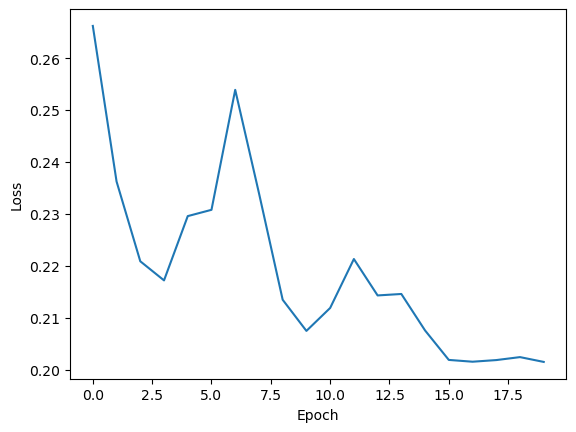

In [17]:
plt.plot(loss_list)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show

In [18]:
accuracy(X_test, Y_test, theta)

0.7272727272727273

Classical ML

In [19]:
clf = svm.SVC()
clf.fit(X_train, Y_train)

SVC()

In [20]:
print(clf.predict(X_test))
print(Y_test)

[1 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 1 1 0 0 1 0 0 1 0 1 0 0 1]
[1 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 1 1 0 0 1 0 0 1 0 1 0 0 1]


Run on Real Quantum computer

In [ ]:
quantum_nn(X_test[6], theta, simulator=False)

In [ ]:
quantam_nn(X_test[6], theta)

In [ ]:
Y_test[6]